# Dataset Exploration For Ford GoBike 2021 
## by Kirolos Raouf Atteya Saad

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
 # Columns:
 0   duration_sec : trip duration time taken <br />
 1   start_time : the start time of the trip<br />
 2   end_time : the end time of the trip after starting<br />
 3   start_station_id : the id of the sart station<br />
 4   start_station_name : the name of the start station<br />
 5   start_station_latitude : the latitude of the start station on the map <br />
 6   start_station_longitude :  the longitude of the start station on the map <br />
 7   end_station_id : the id of the end station<br />
 8   end_station_name : the name of the end station    
 9   end_station_latitude: the latitude of the end station on the map <br />
 10  end_station_longitude: the longitude of the end station on the map <br />
 11  bike_id: the bike id used in the trip <br />
 12  user_type : the user type (customer or subscriber)<br /> 
 13  member_birth_year : the birth date of the user <br />
 14  member_gender : gender of the user <br /> 
 15  bike_share_for_all_trip : bie share for trip (yes or no)<br />


In [1]:
# The first step of all is that we include the needed tools to work with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_fbike = pd.read_csv('201902-fordgobike-tripdata.csv')
# make sure we have loaded the data in a correct way 
df_fbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# examine the total number of rows and columns in our dataset 
df_fbike.shape

(183412, 16)

In [4]:
# examine the data types of each column
df_fbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# examine if there are duplicates in our data 
sum(df_fbike.duplicated())

0

In [6]:
# drop columns that wont help us in our invastigation  
df_fbike.drop(['end_station_latitude', 'start_station_longitude','end_station_longitude','start_station_latitude'], axis=1, inplace=True)
df_fbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [7]:
#dropping the null values as some columns contains some rows with null values.
# as we see, the total number of deleted rows is small compared to the size of the dataset
df_fbike.dropna(inplace=True)
df_fbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


In [8]:
# As we could see, the stat time and end time are not of type datetime, so we will change their type
# we wil change also the column of bike_share_for_all_trip
df_fbike.end_time = pd.to_datetime(df_fbike.end_time)
df_fbike.start_time = pd.to_datetime(df_fbike.start_time)
df_fbike.bike_share_for_all_trip = (df_fbike.bike_share_for_all_trip == 'Yes')
df_fbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  bool          
dtypes: bool(1), date

In [9]:
# convert seconds to minutes and drop old column
df_fbike['duration_minutes'] = df_fbike.duration_sec /60
df_fbike.drop(['duration_sec'], axis=1, inplace=True)
df_fbike.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,False,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,False,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,False,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,False,29.883333


In [10]:
# convert member_birth_year to member_age column
df_fbike['member_age'] = 2021-df_fbike.member_birth_year
df_fbike.drop(['member_birth_year'], axis=1, inplace=True)
df_fbike.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_minutes,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,False,869.750000,37.0
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,False,1030.900000,49.0
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,False,608.166667,32.0
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,True,26.416667,47.0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,False,29.883333,62.0


In [11]:
# finally we will describe our data
df_fbike.describe()

,start_station_id,end_station_id,bike_id,duration_minutes,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,139.002126,136.604486,4482.587555,11.733379,36.196865
std,111.648819,111.335635,1659.195937,27.370082,10.118731
min,3.000000,3.000000,11.000000,1.016667,20.000000
25%,47.000000,44.000000,3799.000000,5.383333,29.000000
50%,104.000000,101.000000,4960.000000,8.500000,34.000000
75%,239.000000,238.000000,5505.000000,13.150000,41.000000
max,398.000000,398.000000,6645.000000,1409.133333,143.000000


### What is the structure of your dataset?

> There are 174952 data trips (rows) for fordgobike in the dataset with 12 columns after cleaning our data: (duration_minutes, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_age, member_gender, bike_share_for_all_trip).
we have 5 numerical columns, 2 datetime, 4 object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I will start invistigating the total trip duration taken by a rider and its relation with other features in our data. 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The age of the user, user type and the gender of the rider 

## Univariate Exploration

> In this section we will do:<br/>
1- investigate the main column of interest<br/>
2- Clean things up in case outliers or unusual points<br/>
3- Relationships between variables.<br/>


Examine the distribution of the main variable of interest which is duration_minutes

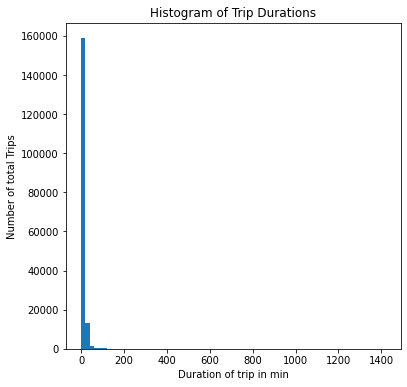

In [12]:

binsize = 20
bins = np.arange(0, df_fbike['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[6, 6])
plt.hist(data = df_fbike, x = 'duration_minutes', bins = bins)
plt.title('Histogram of Trip Durations')
plt.ylabel('Number of total Trips')
plt.xlabel('Duration of trip in min')
plt.show()

As we could see from previous step, there is a long tail in the examined distribution. So, I will put the shape into
log scale instead.

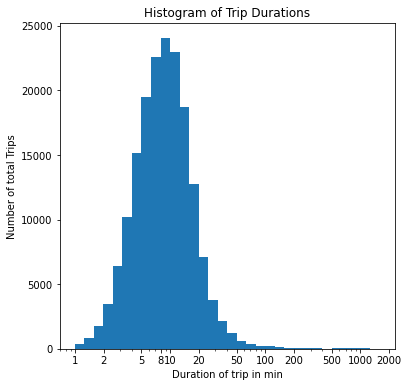

In [13]:

log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df_fbike['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[6,6])
plt.hist(data = df_fbike, x = 'duration_minutes', bins = log_bins)
plt.title('Histogram of Trip Durations')
plt.ylabel('Number of total Trips')
plt.xlabel('Duration of trip in min')
plt.xscale('log')
tick_locs = [1, 2, 5,8, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(tick_locs, tick_locs)
plt.show()

As we can see, the distribution is very similar in shape to the bimodal one with peak ( 8 min and 10 min) for the the trips taken. some of trips also are between 10 to 15 min. Also, there are outliers in our shape for some trips that are beyond the 500 min (around 9 hours) or less than 2 min (can not be a true ride). So i will drop these values.

In [14]:
df_fbike.drop(df_fbike[df_fbike['duration_minutes'] > 500].index, inplace = True)

In [15]:
df_fbike.drop(df_fbike[df_fbike['duration_minutes'] < 2].index, inplace = True)

In [16]:
df_fbike['duration_minutes'].describe()

count    171848.000000
mean         11.292558
std          13.921502
min           2.000000
25%           5.516667
50%           8.616667
75%          13.250000
max         498.333333
Name: duration_minutes, dtype: float64

From the describe method, we are sure that the outliers have been removed. Next we will examine each suspected feature in our data. we will start with the age

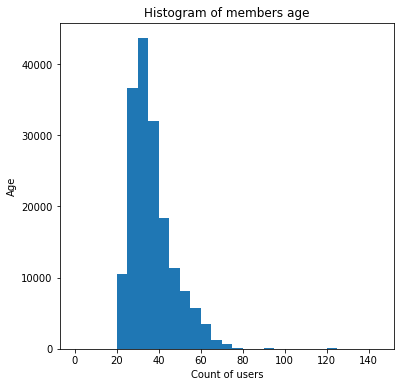

In [17]:
# The first thing to examine 
# Plotting age distribution derived from member's birth year.
binsize = 5
bins = np.arange(0, df_fbike['member_age'].max()+binsize, binsize)
plt.figure(figsize=[6, 6])
plt.hist(data = df_fbike, x = 'member_age', bins = bins)
plt.title('Histogram of members age')
plt.ylabel('Age')
plt.xlabel('Count of users')
plt.show()

As we could see, most of the ages are between 20 to 40 years old and beyond that we could see a decrease in the total number of riders due to being old which is normal. however, there are some outliers in our data as for the riders beyond 80 yeears old. So we will drop these values.

In [18]:
df_fbike.drop(df_fbike[df_fbike['member_age'] > 80].index, inplace = True)
df_fbike['member_age'].describe()

count    171680.000000
mean         36.145777
std           9.871973
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: member_age, dtype: float64

Next, we will examine the gender column 

Text(0, 0.5, 'Number of Users')

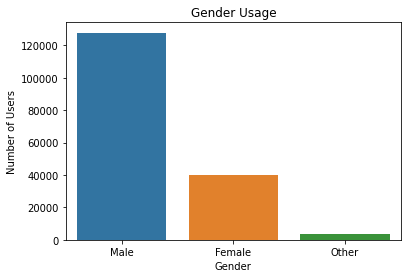

In [19]:
# barplot of gender usage
sb.countplot(data = df_fbike, x = 'member_gender')
plt.title('Gender Usage')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

We will drop the other values as we will focus on males and females only.

In [20]:
df_fbike.drop(df_fbike[df_fbike['member_gender'] == 'Other'].index, inplace = True)

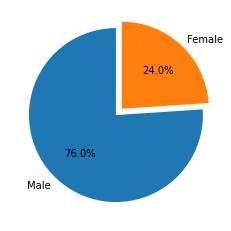

In [21]:
user_gender = df_fbike['member_gender'].value_counts()
plt.pie(user_gender, explode =  (0, 0.1), labels = user_gender.index, startangle = 90, autopct='%1.1f%%');
plt.show()

As we could see, most of riders are males compared to the females.Next, we will focus on user type column

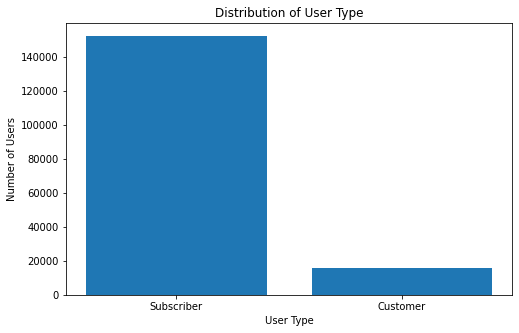

In [22]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df_fbike.user_type.value_counts().keys(), height = df_fbike.user_type.value_counts() )
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

As we could see, most of riders are subscriber into the system (more than 140000) which means that maybe the system offers good package to those rather than being a normal or daily customer (around 20000)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest was the trip duration in minutes, the variable has large values on its scale. So, I did a log transform with peak of values between 8min and 10min for. There was some outilers discussed before and we deal with these values.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distributions. I have convert the birth column to age column to deal with age rather than years for better information extraction, also i have extract the trip duration in min rather than in seconds for simplicity and better analyze the data.

## Bivariate Exploration

> In this section we will do:<br/>
1- investigate the realtion between trip duration taken by a rider and **his/her age**<br/>
2- investigate the realtion between trip duration taken by a rider and **his/her gender**<br/>
3- investigate the realtion between trip duration taken by a rider and **his/he type of subrscription** <br/>

1- Investigate the realtion between trip duration taken by a rider and his/her age

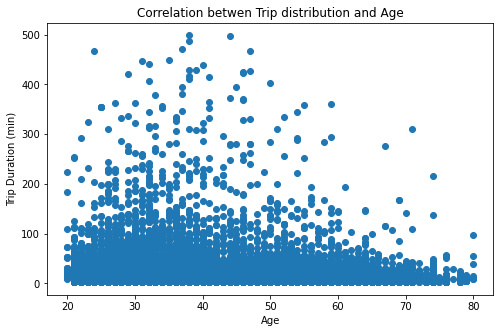

In [49]:
# trip duration in minutes versus age column plotting 
plt.figure(figsize=[8,5])
plt.scatter(data = df_fbike, x = 'member_age', y ='duration_minutes', alpha= None)
plt.title('Correlation betwen Trip distribution and Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.show()

As we could see, there is a negative correlation between trip duration and age meaning that when the age increases, the trip duration will decrease

2- Investigate the realtion between trip duration taken by a rider and his/her gender

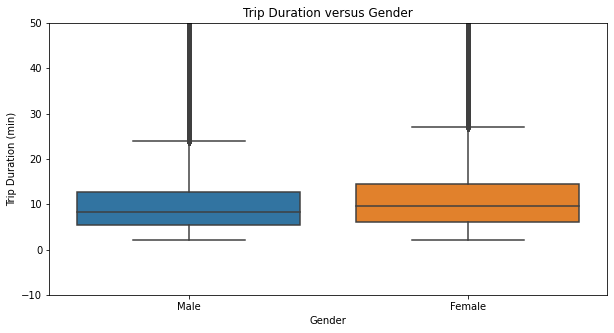

In [50]:
plt.figure(figsize = [10, 5])
sb.boxplot(x='member_gender', y='duration_minutes', data = df_fbike, order=['Male', 'Female'])
plt.ylim(-10, 50)
plt.title('Trip Duration versus Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (min)')
plt.show()

As we could see, the boxplot shows that female participation as in trip duration in minutes is heigher than males by examining the height of each box although total number of male in our dataset is bigger than total number of female


3-Investigate the realtion between trip duration taken by a rider and his/he type of subrscription<br/>

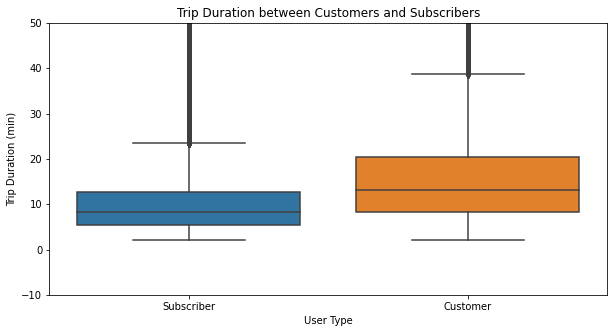

In [56]:
import seaborn as sns
plt.figure(figsize = [10, 5])
sns.boxplot(x='user_type', y='duration_minutes', data = df_fbike)
plt.ylim(-10, 50)
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

As we could see, the boxplot shows that customer participation as in trip duration in minutes is heigher than subscriber by examining the height of each box.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between the total duration taken by a trip versus the age of the rider in negativly correlated meaning that when one increases, the other decreases. This relation is normal as when someone gets older, he could not make a lot of effort 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was surprised when i found that total trip duration of female is higher than male althought number of males in our dataframe is heigher than female. Also, I found that a customer is spending more time riding his bike than a normal subscriber meaning that maybe the company gives good offers and packages for customers.


## Multivariate Exploration

> In this section we will do:<br>
Examine the relation between the age column, gender column, user type and the total trip duration in minutes 


<Figure size 1080x720 with 0 Axes>

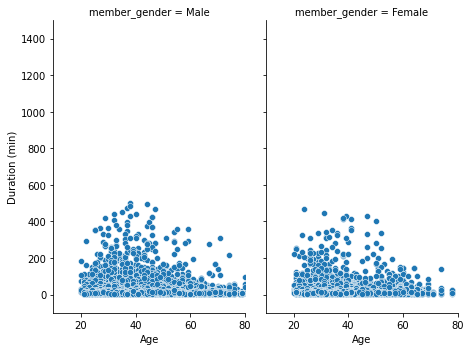

In [60]:
plt.figure(figsize=[15,10])
g = sb.FacetGrid(data = df_fbike, col = 'member_gender', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sns.scatterplot, 'member_age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age', 'Duration (min)')
g.add_legend()
plt.show()


> By examining the two figures, we could say that both have similar ride average as they have very similar plots

<Figure size 1080x720 with 0 Axes>

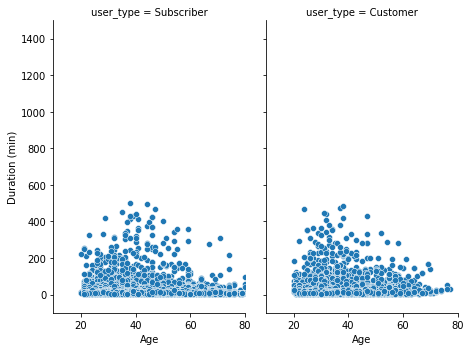

In [64]:
plt.figure(figsize=[15,10])
g = sb.FacetGrid(data = df_fbike, col = 'user_type', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sns.scatterplot, 'member_age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age', 'Duration (min)')
g.add_legend()
plt.show()


Customer and Subscriber are showing similar trends for age and trip duration.


However, for subscribers the trip duration is higher for older age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As we could see, all the graph that we generate in this section are very similar in shape and in trend

### Were there any interesting or surprising interactions between features?

> In the second graph, we examine that subscriber trip duration is higher for older age which is a surprise.

In [65]:
df_fbike.to_csv('df_fbike_clean.csv', index=None)